In [ ]:
def costfcn_v(y, X, b, w):
  """Calculate the mean-squared error cost function for a bivariate linear regression.

  Args:
    y: 1D ndarray of the target variable.
    X: 1D ndarray of the input features.
    b: bias.
    w: weight.

  Returns:
    Cost function value.
  """

  y_hat = b + w * X
  J = np.mean((y_hat - y) ** 2) / 2

  return J

def gradient_v(y, X, b, w):
  """Calculate gradients of the cost function.

  Args:
    y: 1D ndarray of the target variable.
    X: 1D ndarray of the input features.
    b: bias.
    w: weight.

  Returns:
    dJ/db, dJ/dw.
  """

  y_hat = b + w * X
  dJdb = np.mean(y_hat - y)
  dJdw = np.mean((y_hat - y) * X)

  return dJdb, dJdw

def graident_descent_v(y, X, alpha=0.1, tol=1.e-7):
  """Estimate parameters using a gradient decent algorithm.

  Args:
    y: 1D ndarray of the target variable.
    X: 1D ndarray of the input features.
    alpha: learning rate.
    tol: Tolerance. If the relative change of the cost function is less than tol,
      the cost function is considered to have converged to a minimum.

  Returns:
    Parameter estimates, b and w.
  """

  max_iter = 10000  # maximum iteration
  b = np.random.uniform()  # Random initial value of b.
  w = np.random.uniform()  # Random initial value of w.

  J0 = costfcn_v(y, X, b, w)

  for i in range(max_iter):
    # Update parameters.
    dJdb, dJdw = gradient_v(y, X, b, w)
    b -= alpha * dJdb
    w -= alpha * dJdw

    J = costfcn_v(y, X, b, w)
    print(f'{i}: b = {b}, w = {w}, J = {J}')

    # Check convergence.
    if np.abs((J-J0) / J0) < tol:
      break
    else:
      J0 = J

  if i == max_iter:
    print('Maximum iteration reached before convergence.')

  return b, w

In [ ]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [ ]:
# Test data
m = 1000
b = 0.5
w = [3, 1, -0.5, 10]
X = np.random.uniform(-10, 10, (m, 4))
y = b + X @ w + np. random.normal(0, 2, m)



In [ ]:
# Add a column of ones to X for the bias term
X_b = np.c_[np.ones((m,1)),X]

In [ ]:
# Initial parameters
theta = np. zeros(5) # Including bias term
learning_rate = 0.01
iterations = 1000

In [ ]:
# Run gradient descent
theta_final, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

print("Parameter estimates:")
print("Intercept:", theta_final[0])
print("Coefficients:", theta_final[1:])

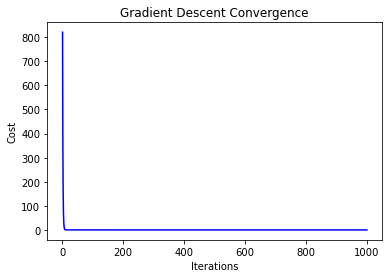

In [7]:
# PLot cost history to visualize convergence
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.show()

In [ ]:
import numpy as np

# Define the functions
def costfcn_v(y, X, b, w):
    """Calculate the mean-squared error cost function for a bivariate linear regression.

    Args:
        y: 1D ndarray of the target variable.
        X: 1D ndarray of the input features.
        b: bias.
        w: weight.

    Returns:
        Cost function value.
    """
    y_hat = b + w * X
    J = np.mean((y_hat - y) ** 2) / 2
    return J

def gradient_v(y, X, b, w):
    """Calculate gradients of the cost function.

    Args:
        y: 1D ndarray of the target variable.
        X: 1D ndarray of the input features.
        b: bias.
        w: weight.

    Returns:
        dJ/db, dJ/dw.
    """
    y_hat = b + w * X
    dJdb = np.mean(y_hat - y)
    dJdw = np.mean((y_hat - y) * X)
    return dJdb, dJdw

def gradient_descent_v(y, X, alpha=0.1, tol=1.e-7):
    """Estimate parameters using a gradient descent algorithm.

    Args:
        y: 1D ndarray of the target variable.
        X: 1D ndarray of the input features.
        alpha: learning rate.
        tol: Tolerance. If the relative change of the cost function is less than tol,
        the cost function is considered to have converged to a minimum.

    Returns:
        Parameter estimates, b and w.
    """
    max_iter = 10000  # maximum iteration
    b = np.random.uniform()  # Random initial value of b.
    w = np.random.uniform()  # Random initial value of w.
    J0 = costfcn_v(y, X, b, w)

    for i in range(max_iter):
        # Update parameters.
        dJdb, dJdw = gradient_v(y, X, b, w)
        b -= alpha * dJdb
        w -= alpha * dJdw
        J = costfcn_v(y, X, b, w)
        print(f'{i}: b = {b}, w = {w}, J = {J}')

        # Check convergence.
        if np.abs((J-J0) / J0) < tol:
            break
        else:
            J0 = J

    if i == max_iter:
        print('Maximum iteration reached before convergence.')

    return b, w

# Sample data generation
m = 1000
b_true = 0.5
w_true = 3
X = np.random.uniform(-10, 10, m)
y = b_true + w_true * X + np.random.normal(0, 2, m)

# Run gradient descent
b_estimate, w_estimate = gradient_descent_v(y, X)

# Print the estimated parameter values
print("\nEstimated parameter values:")
print("Intercept (b_estimate):", b_estimate)
print("Weight (w_estimate):", w_estimate)